# Analysis of similarity matrix

In [5]:
import pandas as pd

df = pd.read_csv('sample_similarity_matrix.csv', index_col=0)
df

,ResNet18,ResNet50,ViT_B_32,Swin_T,DeiT_S,EfficientNet_B3
ResNet18,1.000000,0.873527,0.886217,0.863012,0.900800,0.880547
ResNet50,0.873527,1.000000,0.876015,0.871066,0.891908,0.886809
ViT_B_32,0.886217,0.876015,1.000000,0.845022,0.906861,0.867641
Swin_T,0.863012,0.871066,0.845022,1.000000,0.891450,0.875031
DeiT_S,0.900800,0.891908,0.906861,0.891450,1.000000,0.897462
EfficientNet_B3,0.880547,0.886809,0.867641,0.875031,0.897462,1.000000


## Heatmap

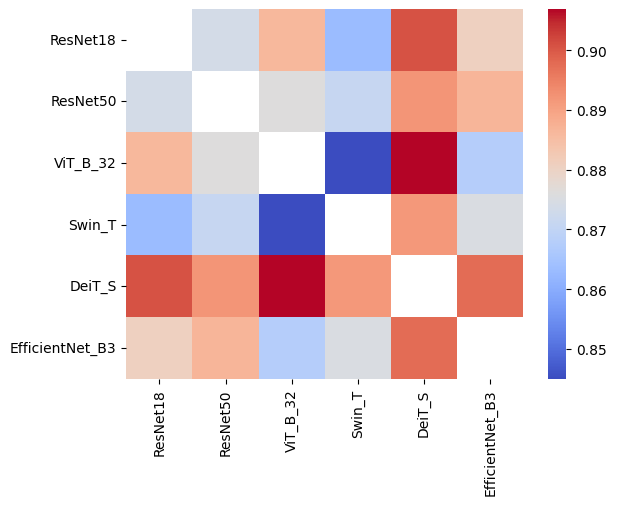

In [2]:
# plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.show()

## PCA of distances

In [31]:
# PCA of distances
df_distances = 1 - df
df_distances

,ResNet18,ResNet50,ViT_B_32,Swin_T,DeiT_S,EfficientNet_B3
ResNet18,0.000000,0.126473,0.113783,0.136988,0.099200,0.119453
ResNet50,0.126473,0.000000,0.123985,0.128934,0.108092,0.113191
ViT_B_32,0.113783,0.123985,0.000000,0.154978,0.093139,0.132359
Swin_T,0.136988,0.128934,0.154978,0.000000,0.108550,0.124969
DeiT_S,0.099200,0.108092,0.093139,0.108550,0.000000,0.102538
EfficientNet_B3,0.119453,0.113191,0.132359,0.124969,0.102538,0.000000


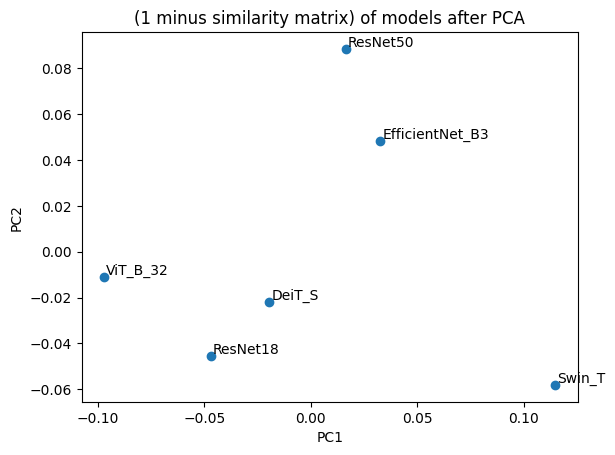

In [33]:
# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'])
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA')
plt.show()

## Clustering

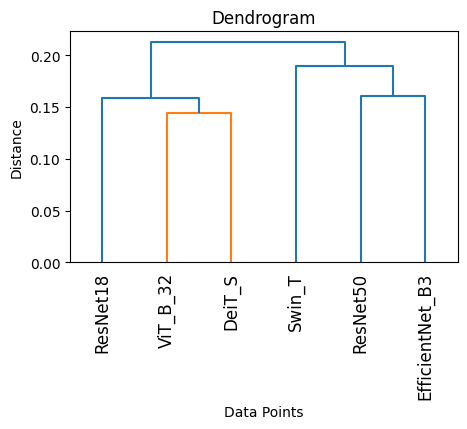

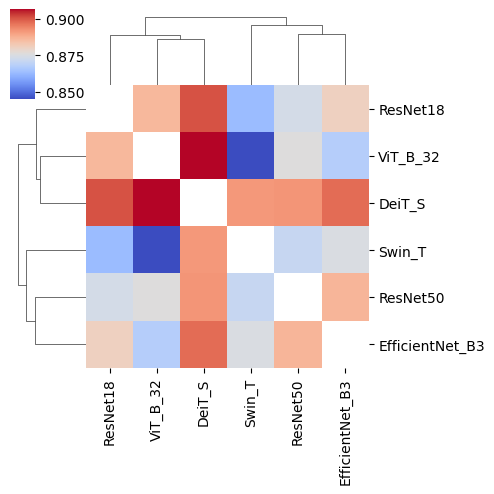

In [66]:
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = hierarchy.ward(df)

# Plot the dendrogram
plt.figure(figsize=(5, 3))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90)

plt.title('Dendrogram')
plt.ylabel('Distance')
plt.xlabel('Data Points')
plt.show()

# Optionally, you can use seaborn's clustermap to visualize clustered heatmap
sns.clustermap(df, method='ward', cmap='coolwarm', mask=mask, figsize=(5, 5))
plt.show()

t:\win_programs\python_venvs\master-thesis-cnn-vs-transformers\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


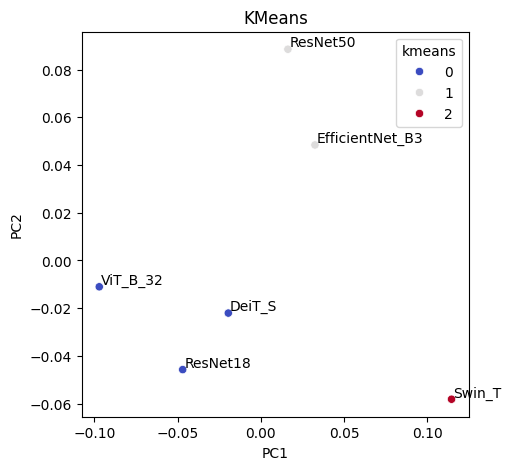

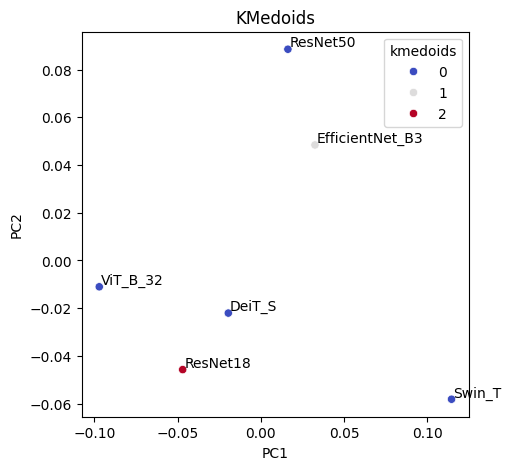

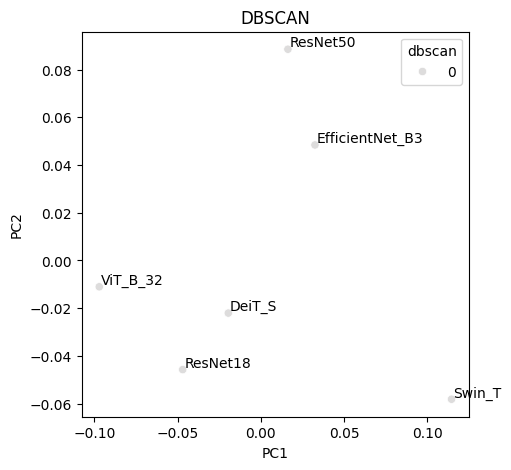

In [90]:
# plot 2d PCA of clustering results: k means, kmedoids and dbscan
from sklearn.cluster import KMeans, DBSCAN

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_distances)
df_distances_pca['kmeans'] = kmeans.labels_

# KMedoids
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(df_distances)
df_distances_pca['kmedoids'] = kmedoids.labels_

# DBSCAN
dbscan = DBSCAN(eps=1)
dbscan.fit(df_distances)
df_distances_pca['dbscan'] = dbscan.labels_

# plot 2d PCA of clustering results
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmeans', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMeans')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmedoids', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMedoids')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='dbscan', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('DBSCAN')
plt.show()